# Grade: /100

## Instructions



* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the Lab assignment.



This notebook contains the questions for Assignment 1. Please note, a random seed has been set to ensure the reproducability of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed as well**. Make sure to complete this assignment individually and appropriately reference all external code and documentation used. 

## Data 
In this Assignmnet you will use 2 separate datasets. Datasets are entitled according to the exam Questions (Dataset1 to be used in Question1, and Dataset2 to be used in Question2).  

You need to download datasets from OWL in the `Assignments / Assignment1`.




### Preliminaries

Feel free to add any libraries to the Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.

In [1]:
## perform the necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import recall_score, make_scorer, mean_squared_error, confusion_matrix, roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans


# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Question 1 - Model Selection (70 pts)

### Dataset

In this question you need to download and use Dataset1. 

Dataset1 lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:
- Age: Player age in years
- Nationality: Players nationality
- Overall: Player overall performance score (higher better)
- Potential: Player potential score (higher better)
- Club: Player home soccer club
- Value: Player value *i.e*, the amount of money a club should pay in order to purchase the player (higher better)
- Wage: Player stipend (higher better)
- Preferred Foot: Player preferred foot to play
- International Reputation: Player international fame (higher better)
- Week Foot: Performance score of player weak foot (higher better)
- Skill Moves: Player move skill score (higher better)
- Body Type: Player body type
- Position: Position player holds on the pitch
- Height: Player height in CM
- Weight: Player weight in kg

### Question 1.1 - Data loading  (8 pts)

- Load `Dataset1.csv` as a pandas dataframe, and display its first 5 rows. 
- Show the statistical summary of the data. 
- How many missing values does dataset contain? 
- Dummy code catecorical variables (drop the first). 

In [2]:
data = pd.read_csv('Dataset1.csv')
data.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,Portugal,86,87,Manchester United,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
1,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
2,31,Belgium,91,91,Manchester City,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
3,25,Italy,86,89,Inter,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68
4,27,Germany,89,90,FC Bayern München,105500000.0,130000.0,Right,4.0,4.0,3.0,Normal,Middle,177,75


In [3]:
data.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,4903.000000,4903.000000,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,25.751581,69.188864,73.407098,5.931980e+06,15037.344483,1.210891,2.992046,2.514787,181.053437,75.154803
std,4.483194,7.005289,6.593820,1.271123e+07,29897.342606,0.572371,0.689830,0.804754,6.979453,7.048869
min,16.000000,47.000000,51.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,156.000000,49.000000
25%,22.000000,64.000000,69.000000,7.750000e+05,1000.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,25.000000,69.000000,73.000000,1.700000e+06,4000.000000,1.000000,3.000000,2.000000,181.000000,75.000000
75%,29.000000,74.000000,78.000000,4.500000e+06,16000.000000,1.000000,3.000000,3.000000,186.000000,80.000000
max,44.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,102.000000


In [4]:
data.isnull().sum()

Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Body Type                   0
Position                    0
Height                      0
Weight                      0
dtype: int64

In [5]:
data = pd.get_dummies(data, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Columns: 997 entries, Age to Position_Middle
dtypes: bool(987), float64(5), int64(5)
memory usage: 5.0 MB


### Question 1.2 - Feature extraction  (6 pts)

- Use `sns.jointplot` to plot the joint distribution between Weight and Height. 
- The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height. 

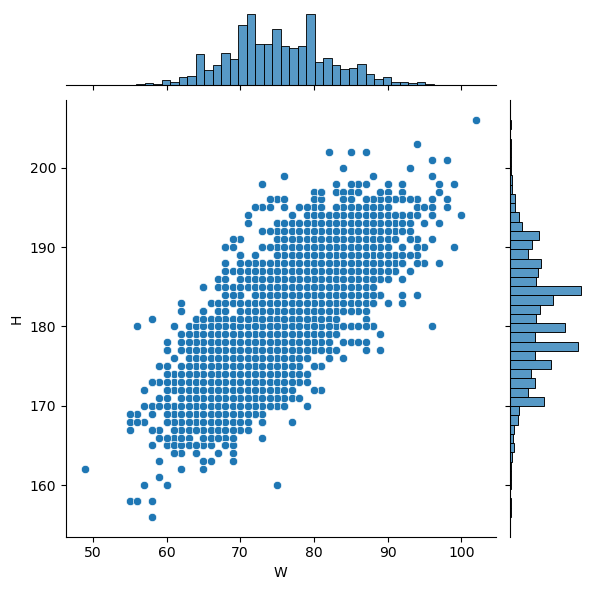

In [6]:
# The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m²
ax = sns.jointplot(x=data.Weight, y=data.Height, kind='scatter')
ax.ax_joint.set_xlabel('W')
ax.ax_joint.set_ylabel('H')
plt.show()

data['BMI'] = data.Weight / (data.Height / 100)**2
data.drop(['Weight', 'Height'], axis=1, inplace=True)

### Question 1.3 - Transformations  (9 pts)

Use `sns.jointplot` to investigate the following relationships and apply Logarithm transformation and replace the feature with its transformation **where needed** (Drop the variables that has been transformed and keep the logarithm transformation of that variable instead):

Note: plot joint distributions **before** and **after** trasformation (if it's needed) to make sure the transformation fixes the problem. 
- Value vs. Wage
- Value vs. Overall
- Value vs. Potential


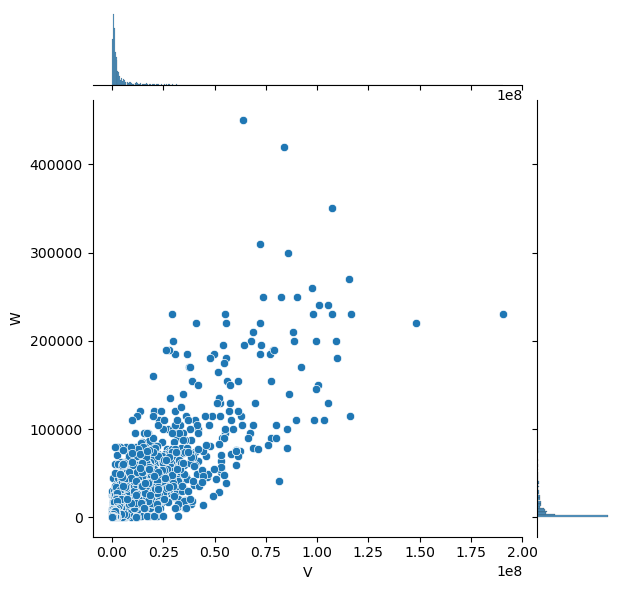

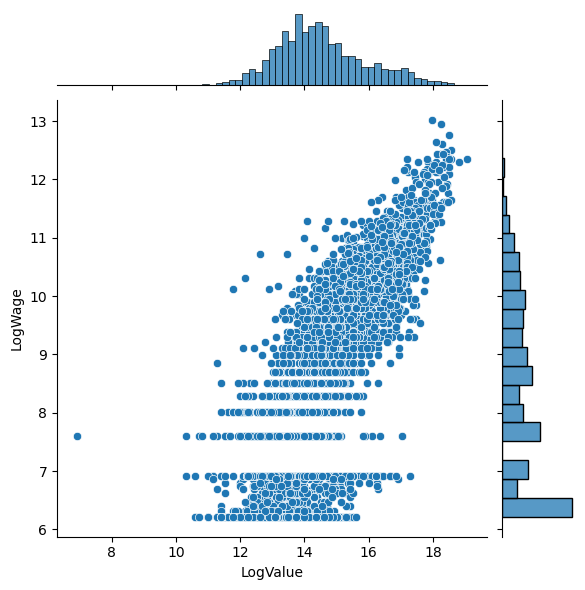

In [7]:
ax = sns.jointplot(x=data.Value, y=data.Wage, kind='scatter')
ax.ax_joint.set_xlabel('V')
ax.ax_joint.set_ylabel('W')
plt.show()

data['LogValue'] = np.log(data.Value)
data['LogWage'] = np.log(data.Wage)
ax = sns.jointplot(x=data.LogValue, y=data.LogWage, kind='scatter')
ax.ax_joint.set_xlabel('LogValue')
ax.ax_joint.set_ylabel('LogWage')
plt.show()

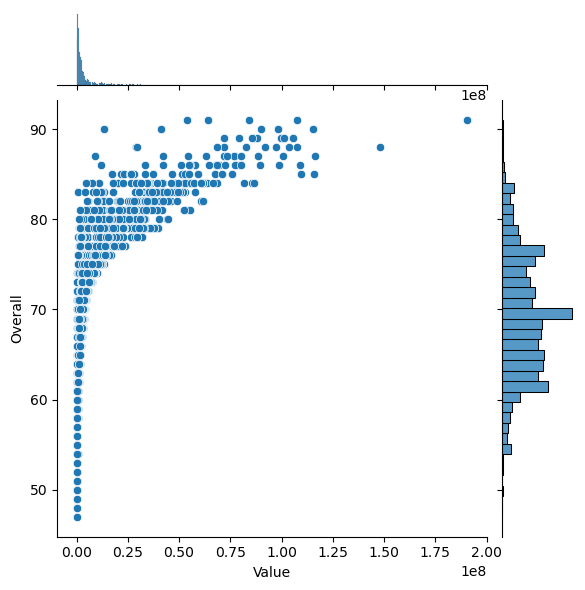

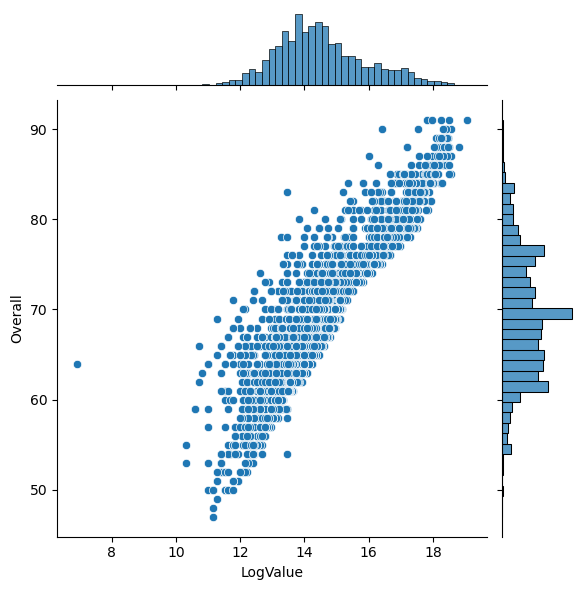

In [8]:
ax = sns.jointplot(x=data.Value, y=data.Overall, kind='scatter')
ax.ax_joint.set_xlabel('Value')
ax.ax_joint.set_ylabel('Overall')
plt.show()

ax = sns.jointplot(x=data.LogValue, y=data.Overall, kind='scatter')
ax.ax_joint.set_xlabel('LogValue')
ax.ax_joint.set_ylabel('Overall')
plt.show()

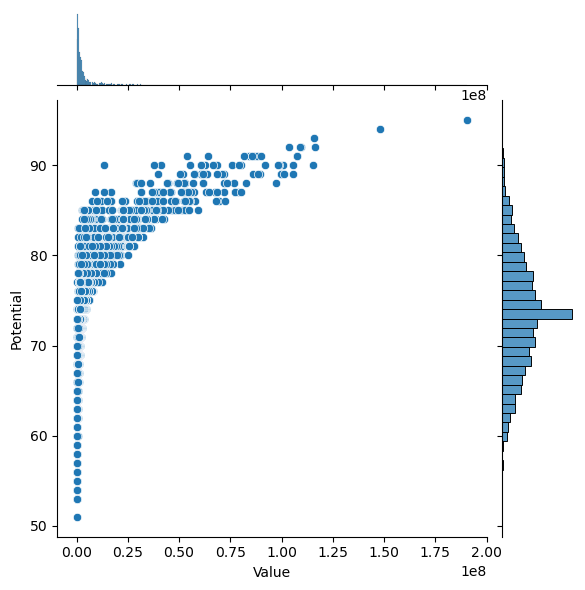

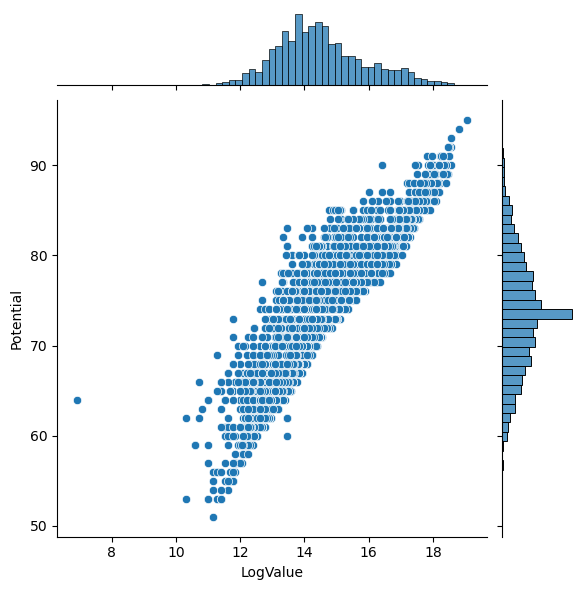

In [9]:
ax = sns.jointplot(x=data.Value, y=data.Potential, kind='scatter')
ax.ax_joint.set_xlabel('Value')
ax.ax_joint.set_ylabel('Potential')
plt.show()

ax = sns.jointplot(x=data.LogValue, y=data.Potential, kind='scatter')
ax.ax_joint.set_xlabel('LogValue')
ax.ax_joint.set_ylabel('Potential')
plt.show()

In [10]:
df = data.drop(['Value', 'Wage'], axis=1, inplace=False)

### Question 1.4 - Data split  (5 pts)

- Split data to put aside 20% for testing purpose (with `random_state=1220`). 
  
  *Note: keep the Value (or LogValue if you transformed it in Question 1.3) as the target variable, and use the remaining variables as features.* 
  

- Also define an RMSE scorer function. 

In [11]:
X = df.drop(['LogValue'], axis=1)
y = df.LogValue

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1220)

# RMSE scorer
def sc(y,ypr):
    return mean_squared_error(y, ypr, squared=False)

### Question 1.5 - Linear Regression  (8 pts)

-   Implement shuffled 5-split Kfold cross-validation on the sklearn's linear regression (with default arguments) and RMSE scorer function above and report the mean of cross validation score.
-   Fit the model to the training set. 
-   Report prediction RMSE score.

In [12]:
LR = LinearRegression()
cv_scores = cross_val_score(LR,
                           Xtrain, ytrain,
                           cv=5,
                           scoring=make_scorer(sc))
print(cv_scores.mean())
LR.fit(Xtrain, ytrain)
print("Prediction RMSE: %.3f" % sc(ytest, LR.predict(Xtest)))

1276919727.727272
Prediction RMSE: 2641663260.250


### Question 1.6 - Ridge Regression  (8 pts)

Bundle the StandardScaler with the sklearn's ridge regression (with default arguments except alpha = 1e-10) into a Pipeline, and:

- Implement shuffled 5-split Kfold cross-validation on the pipeline and report the mean of cross-validated RMSE score. 
- Fit the model to the training set. 
- Report prediction RMSE score.


In [13]:
pip = Pipeline([
    ('standardize', StandardScaler()),
    ('reg', Ridge(alpha=1e-10, fit_intercept=True))
])
cv_scores = cross_val_score(pip,
                           Xtrain, ytrain,
                           cv=5,
                           scoring=make_scorer(sc))
print(cv_scores.mean())
pip.fit(Xtrain, ytrain)
print("Prediction RMSE: %.3f" % sc(ytest, pip.predict(Xtest)))

0.2870484197671265
Prediction RMSE: 0.272


### Question 1.7 - Random Forest  (10 pts)

-   Implement shuffled 5-split Kfold cross-validation on the sklearn's random forest regressor (using "RandomForestRegressor" from sklearn.ensemble library with default arguments except `n_jobs=-1`, and `random_state=1220`), and report the mean of cross-validated RMSE score.
-   Fit the model to the training set 
-   Report prediction RMSE score
-   Use `barplot` to generate the feature importance diagram from this model (limit the plot to the top 5)

0.18462999881922032
Prediction RMSE: 0.159


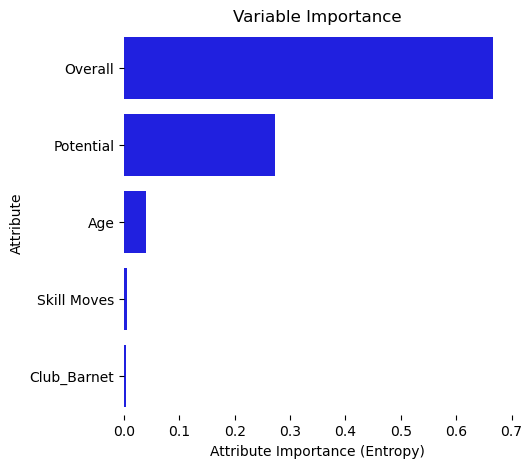

In [14]:
RFR = RandomForestRegressor(n_jobs=-1, random_state=1220)
cv_scores = cross_val_score(RFR,
                           Xtrain, ytrain,
                           cv=5,
                           scoring=make_scorer(sc))
print(cv_scores.mean())
RFR.fit(Xtrain, ytrain)
print("Prediction RMSE: %.3f" % sc(ytest, RFR.predict(Xtest)))
importances = RFR.feature_importances_
indices = np.argsort(importances)[::-1][0:5] 
f, ax = plt.subplots(figsize=(5, 5))
plt.title("Variable Importance")
sns.barplot(y=[RFR.feature_names_in_[i] for i in indices], x=importances[indices], label="Total", color="b")
ax.set(ylabel="Attribute", xlabel="Attribute Importance (Entropy)")
sns.despine(left=True, bottom=True)

### Question 1.8 - Random Forest  and Gridsearch  (14 pts)

- Use the cross-validated grid search tool (5-fold) to find the best possible values for `n_estimators` for your forest. Here are the degrees of freedom for `n_estimators` try `[50, 100, 150]`. Use your RMSE scorer function and put `n_jobs=-1`, `refit = False`, then report the best values found.

- Take the random forest regressor again but this time use the best values found in the previous step, and again:
     -   Implement shuffled 5-split Kfold cross-validation on the sklearn's random forest regressor with the best `n_estimators` you found, `n_jobs=-1`, and `random_state=1220`), and report the mean of cross-validated RMSE score.
     -   Fit the model to the training set. 
     -   Report prediction RMSE score.
     -   Use `barplot` to generate the feature importance diagram from this model (limit the plot to the top 5).


In [15]:
param_grid = {'n_estimators': [50, 100, 150]}

gs = GridSearchCV( RFR,         
                   param_grid,          # Parameter grid
                   cv = 5,              # Cross-validation object.  
                   scoring = make_scorer(sc),
                   n_jobs = -1,         # Parallel jobs. -1 is "all you have"
                   refit = False       # If to show what it is doing.
                )

val_train = df.sample(frac = 0.5, random_state = 1220)
gs.fit(val_train.drop(['LogValue'], axis=1), val_train.LogValue)
gs.best_params_

{'n_estimators': 50}

0.18449729826754618
Prediction RMSE: 0.161


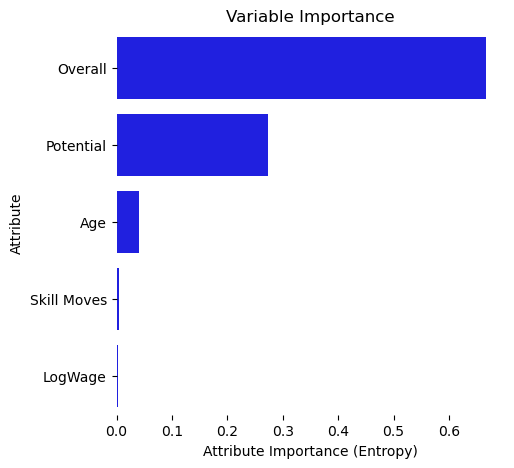

In [16]:
RFR = RandomForestRegressor(n_estimators = 50, n_jobs=-1, random_state=1220)
cv_scores = cross_val_score(RFR,
                           Xtrain, ytrain,
                           cv=5,
                           scoring=make_scorer(sc))
print(cv_scores.mean())
RFR.fit(Xtrain, ytrain)
print("Prediction RMSE: %.3f" % sc(ytest, RFR.predict(Xtest)))
importances = RFR.feature_importances_
indices = np.argsort(importances)[::-1][0:5] 
f, ax = plt.subplots(figsize=(5, 5))
plt.title("Variable Importance")
sns.barplot(y=[RFR.feature_names_in_[i] for i in indices], x=importances[indices], label="Total", color="b")
ax.set(ylabel="Attribute", xlabel="Attribute Importance (Entropy)")
sns.despine(left=True, bottom=True)

### Question 1.9 - Comparison  (2 pts)

**Written question:** From what you have seen in all your results, if you are asked to choose one final model to go into production, which one would you select? (Take computational complexity into account too)

**Your written answer here ** 

RF has better performance (both in training and generalization). 
However, if it comes to complexity comparison, the execution time for Ridge model is shorter while we will sacrfice the accuracy. 

## Question 2: Clustering (30 pts)

### Dataset

In this question you need to download and use Dataset2. 

This dataset is a modified dataset from UCI Machine Learning Datasets. The data contains selling feature on a social media platform. Each record has information about the time the information is posted and engagements in the data (such as emotion). 


### Question 2.1 Data load and normalization (12 pts)

- Load the Dataset. 

- How many observations and attributes do you have in Data set?

- Check for missing values and drop the columns that contain missing values, and ID column.

- Create a label encoder using "LabelEncoder" from scikit learn and convert categorical label (`data_type`) into integers. 

- Then train a ```MinMaxScaler``` method over your full dataset. (**Note**: save a sample of `data_type` column before normalization for further use as the label later in Question 2.3). 

- **Written question:** Explain why it is a good idea to normalize the data for a K-Means clustering process. 

In [17]:
df = pd.read_csv('Dataset2.csv')

df.info()

print("Number of observations:", df.shape[0])
print("Number of attributes:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              7050 non-null   int64 
 1   data_type       7050 non-null   object
 2   data_published  7046 non-null   object
 3   num_reactions   7050 non-null   int64 
 4   num_comments    7050 non-null   int64 
 5   num_shares      7050 non-null   int64 
 6   num_likes       7050 non-null   int64 
 7   num_loves       7050 non-null   int64 
 8   num_wows        7050 non-null   int64 
 9   num_hahas       7050 non-null   int64 
 10  num_sads        7050 non-null   int64 
 11  num_angrys      7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB
Number of observations: 7050
Number of attributes: 12


In [18]:
# find missing values 
df.isnull().sum()


ID                0
data_type         0
data_published    4
num_reactions     0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
dtype: int64

In [19]:
df.drop(['data_published','ID'], axis=1, inplace=True)

In [20]:
# numerize the categorical attribute
X = df
y = df['data_type']
le = LabelEncoder()

X['data_type'] = le.fit_transform(X['data_type'])

y = le.transform(y)

cols = X.columns

ms = MinMaxScaler()

X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[cols])

X.head()

,data_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


**Your written answer here **

Normalization is used to eliminate redundant data and ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms.So it becomes an essential step before clustering as Euclidean distance is very sensitive to the changes in the difference

### Question 2.2 K-Means Clustering - Silhouette (10 pts)

- Use K-means to cluster data. Run a silhouette analysis over the data to answer these question. Create a silhouette plot for 2, 3, and 4 clusters and calculate the corresponding silhouette scores. Use a random seed of 20211231 for your cluster functions. 

- **Written question:** How many clusters would you say the silhouette analysis show are in the data? Why?** 

For n_clusters = 2, the average silhouette_score is : 0.7640959333166648
For n_clusters = 3, the average silhouette_score is : 0.7838777714764834
For n_clusters = 4, the average silhouette_score is : 0.7760619458603171


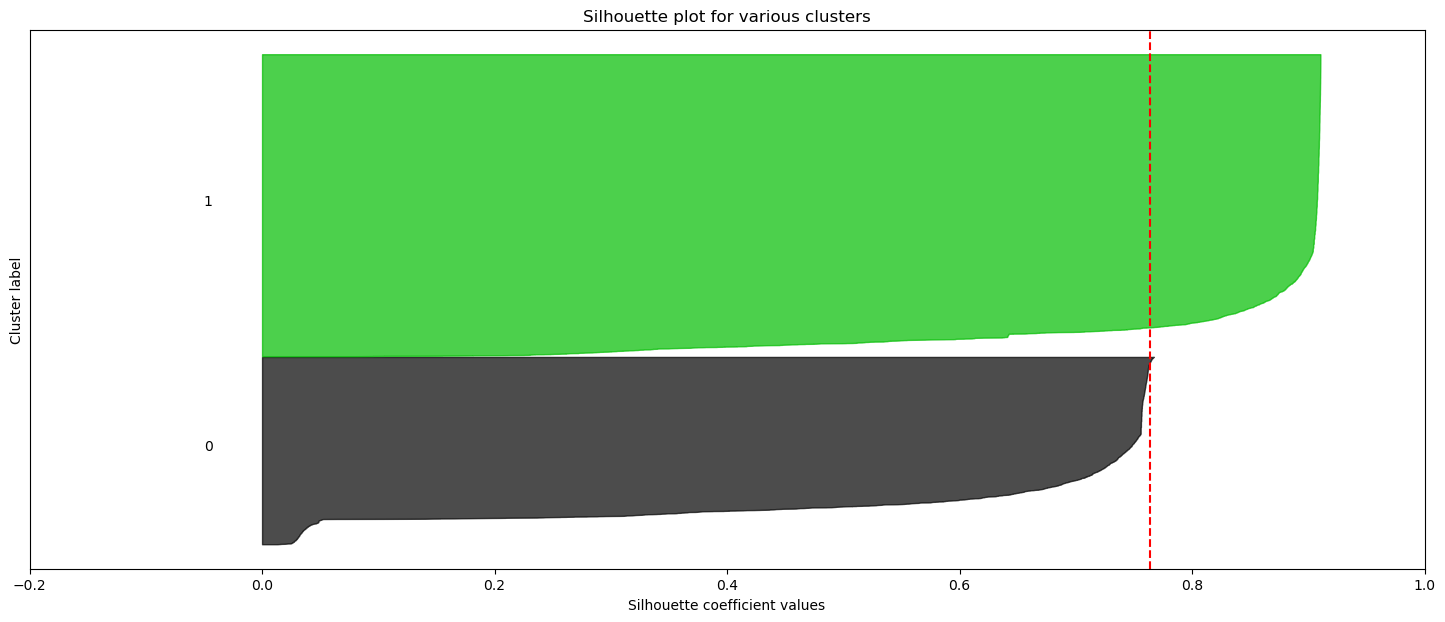

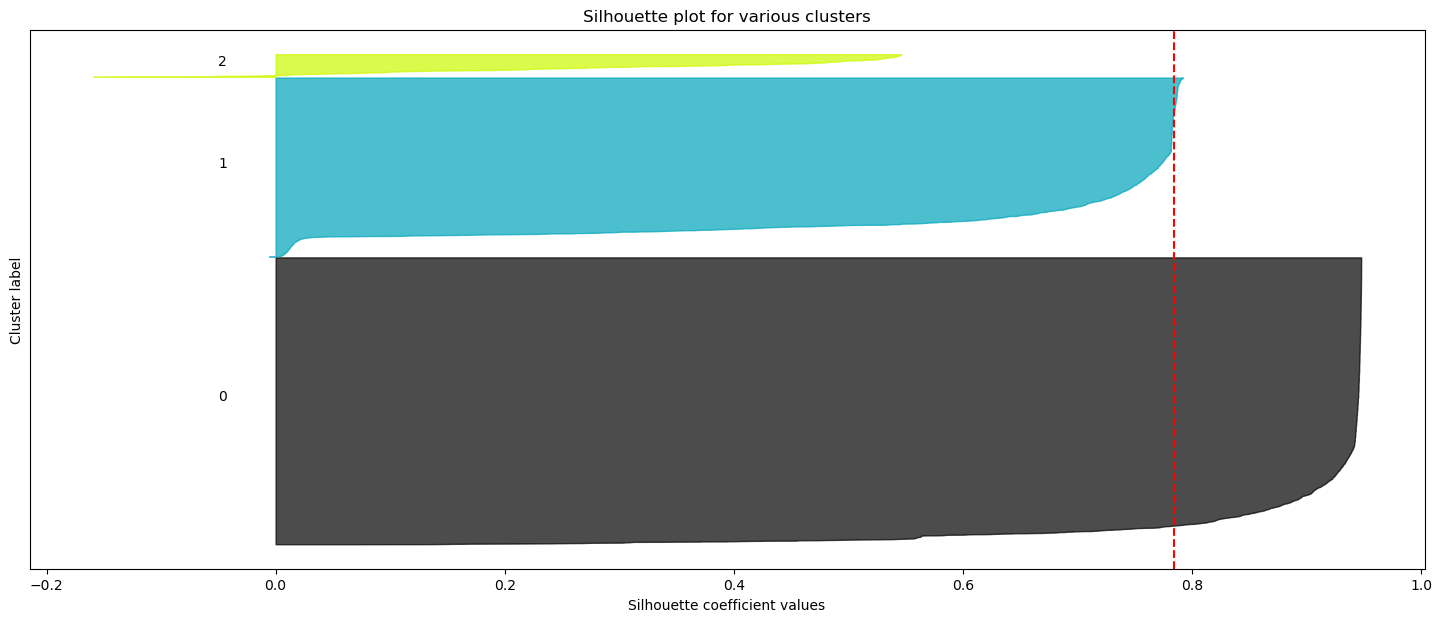

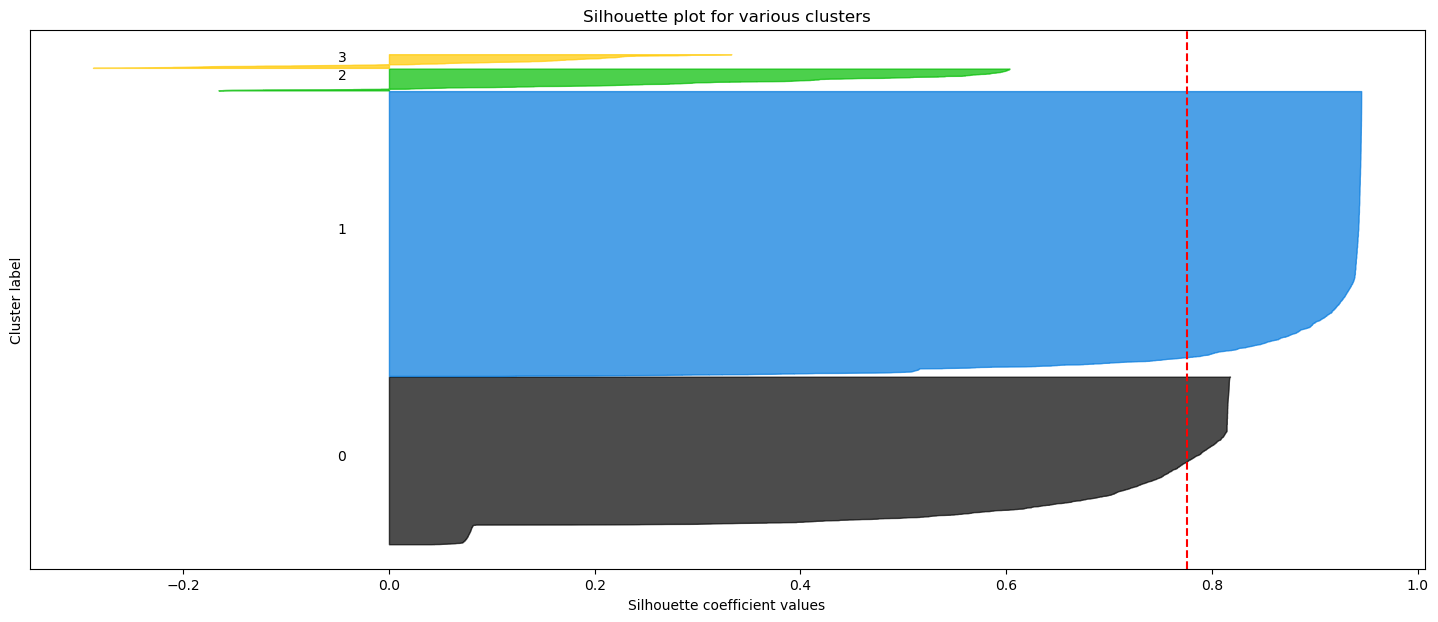

In [21]:
def silhouette_plot(X, range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # Initialize the clusterer
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(X)

        # Silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with cluster numbers
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10

        ax1.set_title("Silhouette plot for various clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Running silhouette analysis for 2, 3, and 4 clusters
silhouette_plot(X, range_n_clusters=[2, 3, 4])

**Your written answer here **

The silhouette analysis does not give us a final conclusion for the number of clusters. 2 clusters shows a good balance among clusters' width and distances to the average line.

### Question 2.3 K-Means Clustering - Elbow (8 pts)

- Use elbow method to find optimal number of clusters for up to 10 clusters. 
- Compare the models accuracy for the best three number of clusters (Hint: use "kmeans.fit").
- **Written question:** Explain your final decision. 

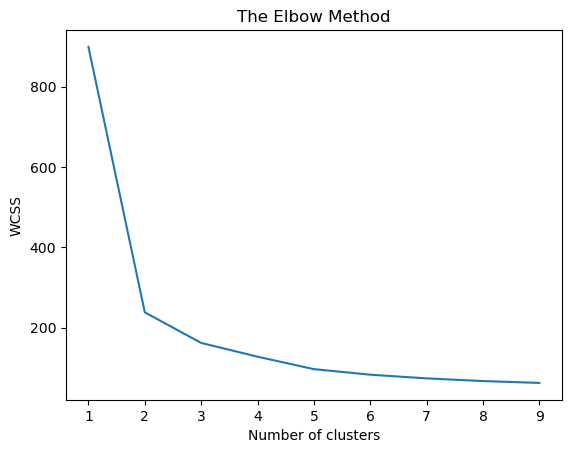

In [22]:
# plot elbow diagram 
WCSS = [] # Within cluster sum of squares
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1, 10), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.show()

In [23]:
NC1, NC2, NC3 = 2, 3, 4 # three best Number of Clusters based on elbow plot

# Comparing models for these cluster numbers
kmeans1 = KMeans(NC1, random_state=42).fit(X)
kmeans2 = KMeans(NC2, random_state=42).fit(X)
kmeans3 = KMeans(NC3, random_state=42).fit(X)

def calculate_accuracy(model, true_labels):
    # check how many of the samples were correctly labeled
    predicted_labels = model.labels_
    return accuracy_score(true_labels, predicted_labels)
    

print(f"Accuracy for {NC1} clusters: {calculate_accuracy(kmeans1, y)}")
print(f"Accuracy for {NC2} clusters: {calculate_accuracy(kmeans2, y)}")
print(f"Accuracy for {NC3} clusters: {calculate_accuracy(kmeans3, y)}")

Accuracy for 2 clusters: 0.6082269503546099
Accuracy for 3 clusters: 0.01957446808510638
Accuracy for 4 clusters: 0.6160283687943262


**Your written answer here **

The elbow is at 2, or 3 clusters might be better options. However, in prediction results we can achieve a much higher accuracy of with 4 clusters. 



In [24]:
# Even using interia metric verifies that as shown below. (this is not part of marking it's for students knowledge only)!!

inertia1 = kmeans1.inertia_
inertia2 = kmeans2.inertia_
inertia3 = kmeans3.inertia_

print(f"Inertia for {NC1} clusters: {inertia1}")
print(f"Inertia for {NC2} clusters: {inertia2}")
print(f"Inertia for {NC3} clusters: {inertia3}")

# A lower inertia value indicates that the data points within each cluster are closer to their respective centroids. 
# This shows compactness which is a desirable in clustering, suggests that the members of each cluster are more similar to each other.
# Also, lower inertia shows better separation between different clusters where the centroids are well-placed to minimize the distances 
# to their assigned points, reducing the likelihood of overlapping clusters.

Inertia for 2 clusters: 237.75726404419547
Inertia for 3 clusters: 161.59633400033616
Inertia for 4 clusters: 127.31215896781879
